In [1]:
import otter
grader = otter.Notebook()

# Homework 2: Linear Regression

**Reading**: 
* [Linear Regression](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

This assignment is due by **11:59pm on the due date listed in Canvas**. Start early so that you can come to office hours if you're stuck. Check Canvas for the office hours schedule. Late work will not be accepted as per the policies described in the Canvas syllabus. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import pandas as pd
import seaborn as sns
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import otter
grader = otter.Notebook()

## Exploring the PTEN Gene with Linear Regression

## 1. PTEN Linear Regression

This week's homework is about linear regression. The dataset we'll be using is from the Cancer Cell Line Encyclopedia -- you can read more about this database in this [paper](https://www.nature.com/articles/s41586-019-1186-3) and interact with the data yourself at the online portal [here](https://portals.broadinstitute.org/ccle).

The specific dataset we'll be taking a look at is expression data for the PTEN gene in around 1000 cell lines. The PTEN gene is a tumor-suppressing gene, and mutations in the PTEN gene are associated with many types of cancer. A cell line is group of cells that are kept alive and replicate indefinitely in culture (grown in petri dishes, for example).

Run the following cell to load the `pten` table. The `pten` table has four columns, a column for the specific `Cell Line`, a column for the `Copy Number`, which is how many times a copy of a portion of the PTEN gene is found in the DNA of that cell line, `mRNA Expression (Affy)`, and `mRNA Expression (RNAseq)`.

In [4]:
# Just run this cell
pten = pd.read_csv("pten.csv")
pten.head(5)

,Cell Line,Copy Number,mRNA Expression (Affy),mRNA Expression (RNAseq)
0,DMS53_LUNG,0.1728,7.482898,2.489797
1,SW1116_LARGE_INTESTINE,0.1910,8.154946,2.868566
2,NCIH1694_LUNG,-0.2372,7.993083,2.821475
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.0129,9.963575,4.657019
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-1.1013,8.741163,2.752360


array([[<Axes: title={'center': 'Copy Number'}>]], dtype=object)

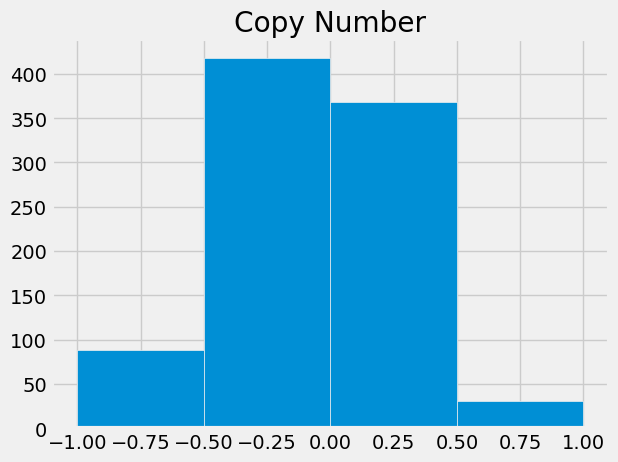

In [5]:
# Just run this cell
pten.hist("Copy Number", bins = np.arange(-1, 1.5, 0.5))

**Question 1**

Looking at the histogram above, we want to check whether or not `Copy Number` is in standard units. For this question, compute the mean and the standard deviation of the values in `Copy Number` and assign these values to `copy_number_mean` and `copy_number_sd` respectively. After you calculate these values, assign `is_su` to either `True` if you think that `Copy Numbers` is in standard units or `False` if you think otherwise.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [6]:
copy_number = pten["Copy Number"]
copy_number_mean = copy_number.mean()
copy_number_sd = copy_number.std()
is_su = False
print(f"Mean: {copy_number_mean}, SD: {copy_number_sd}, Is in standard units?: {is_su}")

Mean: -0.19447913669064748, SD: 0.7466239639509008, Is in standard units?: False


In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2**

Create the function `standard_units` so that it converts the values in the array `arr` to standard units. We'll then use `standard_units` to create a new table, `pten_su`, that converts all the values in the table `pten` to standard units.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [10]:
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)
# DON'T DELETE OR MODIFY ANY OF THE LINES OF CODE BELOW IN THIS CELL
pten_su = pd.DataFrame({
    "Cell Line": pten["Cell Line"],
    "Copy Number SU": standard_units(pten["Copy Number"]),
    "mRNA Expression (Affy) SU": standard_units(pten["mRNA Expression (Affy)"]),
    "mRNA Expression (RNAseq) SU": standard_units(pten["mRNA Expression (RNAseq)"])})
pten_su.head(5)

,Cell Line,Copy Number SU,mRNA Expression (Affy) SU,mRNA Expression (RNAseq) SU
0,DMS53_LUNG,0.492173,-0.925344,-0.170770
1,SW1116_LARGE_INTESTINE,0.516562,-0.355245,0.099226
2,NCIH1694_LUNG,-0.057248,-0.492553,0.065659
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.243325,1.179019,1.374083
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-1.215186,0.142045,0.016391


In [11]:
grader.check("q1_2")

q1_2 results: All test cases passed!

You should always visually inspect your data, before numerically analyzing any relationships in your dataset. Run the following cell in order to look at the relationship between the variables in our dataset.

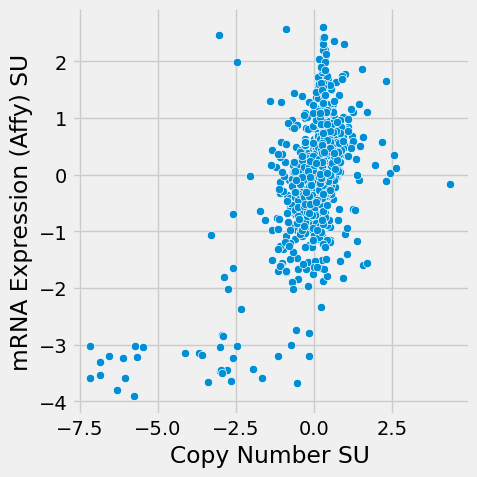

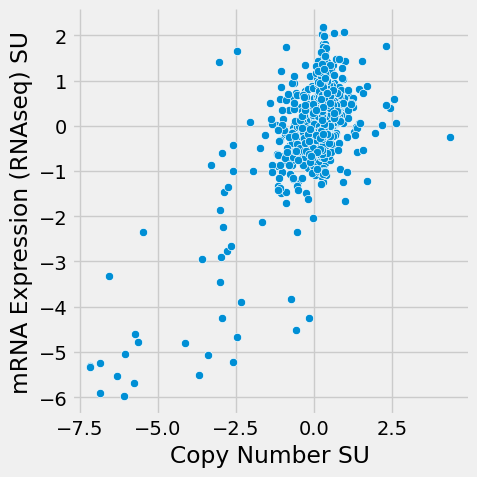

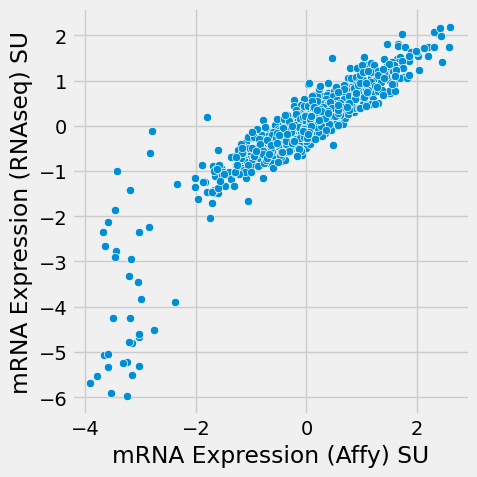

In [14]:
sns.relplot(x="Copy Number SU", y="mRNA Expression (Affy) SU", data=pten_su)
sns.relplot(x="Copy Number SU", y="mRNA Expression (RNAseq) SU", data=pten_su)
sns.relplot(x="mRNA Expression (Affy) SU", y="mRNA Expression (RNAseq) SU", data=pten_su)

**Question 3**

Which of the following relationships do you think has the highest correlation (i.e. highest absolute value of `r`)? Assign `highest_correlation` to the number corresponding to the relationship you think has the highest correlation.

1. Copy Number vs. mRNA Expression (Affy)
2. Copy Number vs. mRNA Expression (RNAseq)
3. mRNA Expression (Affy) vs. mRNA Expression (RNAseq)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [15]:
highest_correlation = 3

In [11]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4**

Now, using the `standard units` function, define the function `correlation` which computes the correlation between `arr1` and `arr2`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [17]:
def correlation(arr1, arr2):
    return np.mean(standard_units(arr1) * standard_units(arr2))

# This computes the correlation between the different variables in pten
copy_affy = correlation(pten["Copy Number"], pten["mRNA Expression (Affy)"])
copy_rnaseq = correlation(pten["Copy Number"], pten["mRNA Expression (RNAseq)"])
affy_rnaseq = correlation(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])

print(f" \
Copy Number vs. mRNA Expression (Affy) Correlation: {copy_affy}, \n \
Copy Number vs. mRNA Expression (RNAseq) Correlation: {copy_rnaseq}, \n \
mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: {affy_rnaseq}")

 Copy Number vs. mRNA Expression (Affy) Correlation: 0.5819516653311987, 
 Copy Number vs. mRNA Expression (RNAseq) Correlation: 0.6954196009651351, 
 mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: 0.9000764746535077


In [18]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5**

If we switch what we input as arguments to `correlation`, i.e. found the correlation between `mRNA Expression (Affy)` vs. `Copy Number` instead of the other way around, would the correlation change? Assign `correlation_change` to either `True` if you think yes, or `False` if you think no.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [19]:
correlation_change = False

In [20]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 6**

Looking at both the scatter plots after Question 2 and the correlations computed in Question 4, describe a pattern you see in the relationships between the variables.

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->
<!-- EXPORT TO PDF -->

* The RNA sequence and AFFY have the greater correlation compared tot he other expressions.*

**Question 7**

Let's look at the relationship between mRNA Expression (Affy) vs. mRNA Expression (RNAseq) only. Define a function called `regression_parameters` that returns the parameters of the regression line as a two-item array containing the slope and intercept of the regression line as the first and second elements respectively. The function `regression_line` takes in two arguments, an array of `x` values, and an array of `y` values.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [22]:
def regression_parameters(x, y):
    sd_x = np.std(x)
    sd_y = np.std(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    slope = sd_y / sd_x
    intercept = mean_y * mean_x
    return np.array([slope, intercept])

parameters = regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])
parameters

array([  1.19005404,  23.40080121])

In [23]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 8**

If we switch what we input as arguments to `regression_parameters`, i.e. found the parameters for the regression line for `mRNA Expression (RNAseq)` vs. `mRNA Expression (Affy)` instead of the other way around, would the regression parameters change (would the slope and/or intercept change)? Assign `parameters_change` to either `True` if you think yes, or `False` if you think no.

<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [24]:
parameters_change = True

In [25]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 9**

Now, let's look at how the regression parameters look like in standard units. Use the table `pten_su` and the function `regression_parameters`, and assign `parameters_su` to a two-item array containing the slope and the intercept of the regression line for mRNA Expression (Affy) in standard units vs. mRNA Expression (RNAseq) in standard units.


<!--
BEGIN QUESTION
name: q1_9
manual: false
-->

In [27]:
parameters_su = regression_parameters(pten["mRNA Expression (RNAseq)"],pten['mRNA Expression (Affy)'])
parameters_su

array([  0.84029798,  23.40080121])

In [28]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 10**

Looking at the array `parameters_su`, what do you notice about the slope and intercept values specifically? Relate them to another value we already calculated in a previous question, as well as relate them to an equation.


<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

*as the slope decreases, the intercept increases. Resulting to a negative correlation.*

**Question 11**

The oldest and most commonly used cell line in Biology is the HeLa cell line, named after Henrietta Lacks, whose cervical cancer cells were taken without her consent in 1951 to create this cell line. The issue of data privacy and consent is very important to data science! You can read more about this topic [here](https://www.hopkinsmedicine.org/henriettalacks/).

The HeLa cell line is missing from our dataset. If we know that the HeLa mRNA Expression (Affy) value is 8.2, what is the predicted mRNA Expression (RNAseq) value? Use the values in `parameters` that we derived in Question 1.7, and assign the result to `hela_rnaseq`.

<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [29]:
parameters = regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])
hela_affy = 8.2
slope = parameters.item(0)
intercept = parameters.item(1)
hela_rnaseq = slope * hela_affy + intercept
hela_rnaseq

33.15924430127282

In [30]:
grader.check("q1_11")

q1_11 results: All test cases passed!

**Question 12**

Compute the predicted mRNA Expression (RNAseq) values from the mRNA Expression (Affy) values in the `pten` table. Use the values in the `parameters` array from Question 1.7, and assign the result to `predicted_rnaseq`. We'll plot your computed regression line with the scatter plot from after question 1.2 of mRNA Expression (Affy) vs. mRNA Expression (RNAseq).

<!--
BEGIN QUESTION
name: q1_12
manual: true
-->
<!-- EXPORT TO PDF -->

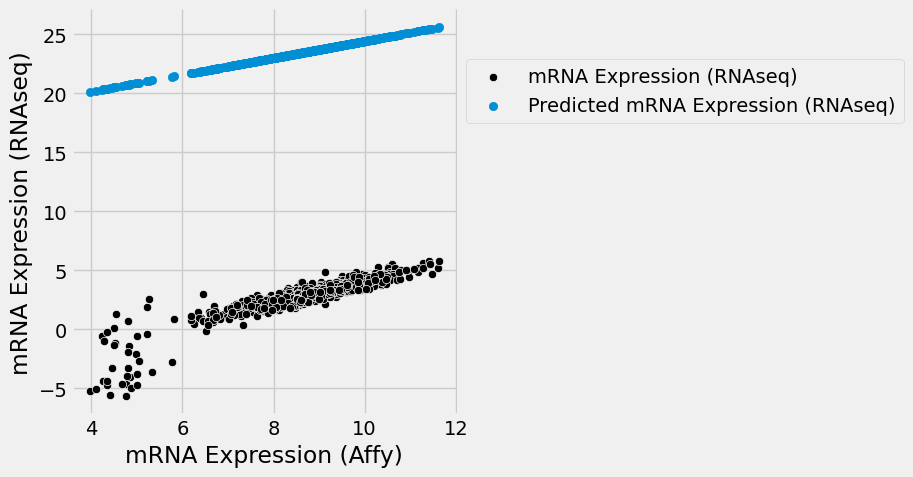

In [36]:
predicted_rnaseq = parameters_su.item(0) * pten_su["mRNA Expression (Affy) SU"] + parameters_su.item(1)
pten["Predicted mRNA Expression (RNAseq)"] = predicted_rnaseq


# DON'T CHANGE/DELETE ANY OF THE BELOW CODE IN THIS CELL
sns.relplot(x = "mRNA Expression (Affy)", y = "mRNA Expression (RNAseq)", data = pten, color = "black")
plt.scatter(x = "mRNA Expression (Affy)", y = "Predicted mRNA Expression (RNAseq)", data = pten)
plt.legend(labels=["mRNA Expression (RNAseq)", "Predicted mRNA Expression (RNAseq)"], bbox_to_anchor=(1,0.9));


## Fitting a least-squares regression line

Recall that the least-square regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error.

**Question 13**

Define a function called `RMSE`. It should take two arguments:

1. the slope of a line (a number)
2. the intercept of a line (a number).

It should return a number that is the root mean squared error (RMSE) for a line defined with the arguments slope and intercept used to predict mRNA Expression (RNAseq) values from mRNA Expression (Affy) values for each row in the `pten` table.

*Hint: Errors are defined as the difference between the actual `y` values and the predicted `y` values.*

*Note: if you need a refresher on RMSE, here's the [link](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#Root-Mean-Squared-Error) from the textbook*

<!--
BEGIN QUESTION
name: q1_13
manual: false
-->

In [37]:
def RMSE(slope, intercept):
    affy = pten["mRNA Expression (Affy)"]
    rnaseq = pten["mRNA Expression (RNAseq)"]
    predicted_rnaseq = slope * affy + intercept
    mse = np.mean((rnaseq - predicted_rnaseq) ** 2)
    rmse = mse ** .5
    return rmse

# DON'T CHANGE THE FOLLOWING LINES BELOW IN THIS CELL
rmse_example = RMSE(0.5, 6)
rmse_example

7.6120081792269936

In [38]:
grader.check("q1_13")

q1_13 results: All test cases passed!

**Question 14**

What is the RMSE of a line with slope 0 and intercept of the mean of `y` equal to?

*Hint 1: The line with slope 0 and intercept of mean of `y` is just a straight horizontal line at the mean of `y`*

*Hint 2: What does the formula for RMSE become if we input our predicted `y` values in the formula. Try writing it out on paper! It should be a familiar formula.*

<!--
BEGIN QUESTION
name: q1_14
manual: true
-->
<!-- EXPORT TO PDF -->

* It is equal to the standard deviation of y.*

**Question 15**

Find the parameters that minimizes RMSE of the regression line for mRNA Expression (Affy) vs. mRNA Expression (RNAseq). Assign the result to `minimized_parameters`.

If you haven't tried to use the `minimize` [function](http://data8.org/sp20/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

*Hint: Use the `RMSE` function in Question 1.13*

**NOTE: When you use the minimize function, please pass in `smooth=True` as the second argument to this function. You'll need to do this, otherwise, your answer will be incorrect**

<!--
BEGIN QUESTION
name: q1_15
manual: false
-->

In [39]:
minimized_parameters = minimize(RMSE, smooth = True)
minimized_parameters

array([ 1.0711393, -6.4542809])

In [40]:
grader.check("q1_15")

q1_15 results: All test cases passed!

**Question 16**

The slope and intercept pair you found in Question 1.15 should be very similar to the values that you found in Question 1.7. Why were we able to minimize RMSE to find the same slope and intercept from the previous formulas?


<!--
BEGIN QUESTION
name: q1_16
manual: true
-->
<!-- EXPORT TO PDF -->

*because RMSE is a measure of accuracy for a regression line.*

**Question 17**

If we had instead minimized mean squared error (MSE), would we have gotten the same slope and intercept of the minimized root mean squared error (RMSE) results? Assign `same_parameters` to either `True` if you think yes, or `False` if you think no.


<!--
BEGIN QUESTION
name: q1_17
manual: false
-->

In [41]:
same_parameters = True
same_parameters

True

In [42]:
grader.check("q1_17")

q1_17 results: All test cases passed!

Let's look at the scatter plot of the relationship between mRNA Expression (Affy) and mRNA Expression (RNAseq) again:

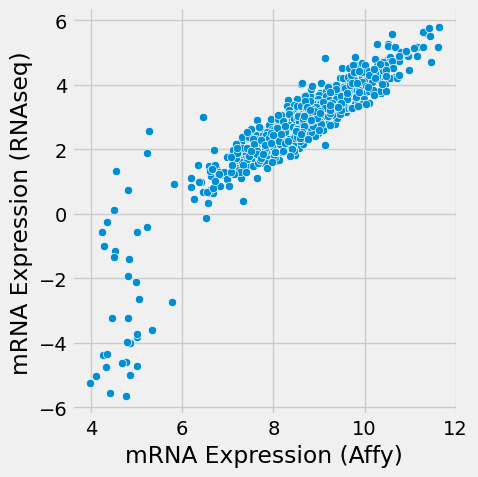

In [44]:
sns.relplot(data = pten, x = "mRNA Expression (Affy)", y = "mRNA Expression (RNAseq)");

**Question 18**

Using a linear regression model, would we be able to obtain accurate predictions for most of the points? Explain why or why not.


<!--
BEGIN QUESTION
name: q1_18
manual: true
-->
<!-- EXPORT TO PDF -->

*yes because the data shows a strong positive linear relationship with minimal deviation from the trend.*

## (OPTIONAL, NOT IN SCOPE) Logarithmic Plots

A kind of visualization you will frequently encounter as a data scientist is a scatter plot or line plot that uses a logarithmic scale. This **Optional** section will cover how to read and generate logarithmic plots. Since this is optional, there is no autograded/free response questions for these sections. Just read, run cells, and explore.

What is a logarithm? A logarithm helps us find the inverse of an equation that uses exponentials. Specifically, if

$$a^y = x$$

Then

$$\log_a{x} = y$$

The most commonly used $a$, which is known as the base of the logarithm, is $e$, which is equivalent to about 2.718, or 10 (for powers of 10).

We can use `numpy` to take logs in Python! By default, np.log uses a base of e.

In [45]:
np.array([np.log(np.e), np.log(np.e**2), np.log(100)])


array([ 1.        ,  2.        ,  4.60517019])

Back to the visualization: when we are plotting trends that grow exponentially, such as the line

$$ y = e^x$$

our y-axis needs to have a large range of values, which makes it difficult to understand.

Let's see what this looks like:

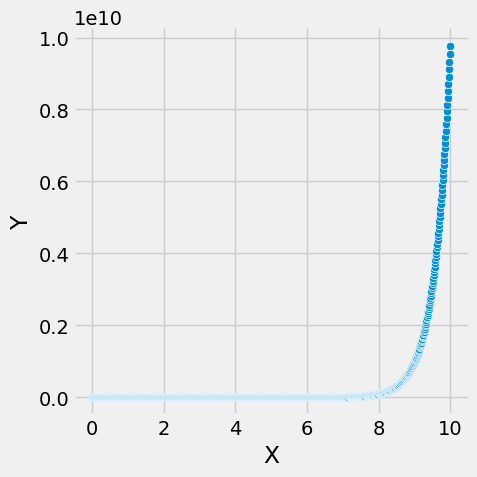

In [46]:
x = np.arange(0, 10, 1/100)
y = 10 ** x
sns.relplot(data = pd.DataFrame({"X": x, "Y": y}), x = "X", y = "Y");

Note that since $10^{10}$ is so big, we can't really see what's happening at all to the y values when they have x values below 8.

One solution to this to change our y and/or x axis so that instead of having even spaces between the tick marks, our marks grow by an uneven factor. We do this by making the tick marks go on a logarithmic scale, and we'll then be able to understand our data better!

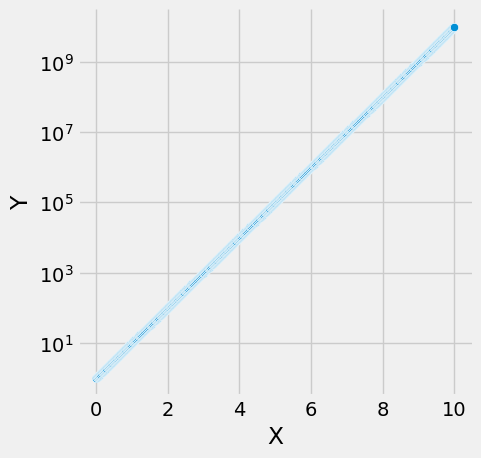

In [47]:
sns.relplot(data = pd.DataFrame({"X": x, "Y": y}), x = "X", y = "Y")
plt.yscale("log")

Now we can tell what's happening to the y values for every x value!

Note how the y values start at $10^0=1$, and increase by a *factor* of $10$ each mark - the next mark is $10^1 = 10$, then $10^2=100$.

You still read this plot like a normal plot, so at a value of $x=5, y=10^5=10000$.

How do you calculate intermediate values? 

At a value like $x = 2.5$ it looks like the y value is somewhere in-between $10^1$ and $10^3$. In this graph with a logarithmic scale, you would say that $y=10^{2.5} \approx 316$.

When visualizing data about the spread of diseases, you will commonly run into plots with logarithmic scales, such as this example from the New York Times. Make sure to always know what the scales of the data are! 

<img src="virus-log-chart.jpg" width="650"/>

Image is from https://www.nytimes.com/2020/03/20/health/coronavirus-data-logarithm-chart.html

You're done with HW 2! Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the HW2 assignment in **Canvas** by 11:59pm on the due date.